<a href="https://colab.research.google.com/github/flying-bear/kompluxternaya/blob/master/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Demostrate consequences of No Free Lunch Theorem: every model of machine learning makes **assumptions** about dataset properties. If the assumption fails, model perfoms badly. If the assumption is met, model perfoms good.

For each of the tasks, described below:
1. create a dataset to meet the description. For demonstration purposes, feature dimension size = 2    
1. train the models and evaluate accuracy. (with a training pipeline, described in the seminar: separate the data into *train, validation, and test*) 
1. Show which model is better.   
1. Write what assumptions were used, and why model exibits such behavior.  
1. Plot dataset to demonstrate its properties. (Scatter plot, classes with different colors)  


Tasks:

1. Create dataset for binary classification task (binary crossentropy), 
where k-NN perfoms **worse** than logistic regression

2. Create dataset for binary classification task (binary crossentropy), 
where logistic regression perfoms **worse** than k-NN

3. Create dataset for binary classification task (binary crossentropy), 
where k-NN with cosine distance perfoms **better** than k-NN with euclidean distance


! If there is no explanation, why one model perfoms better than the other on your dataset, the task does not count.  
! if the training pipeline is not used, the task does not count.  

[making datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

[Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


[k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [0]:
#example from gridsearch doc

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(iris.data, iris.target)

print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Task 1
чтоб k-NN работал плохо, а регрессия хорошо, сделаем линейно разделимые, но плохо очереченные кластеры, где ближайший сосед того-же класса дальше, чем ближайший сосед другого

In [0]:
n_samples = 100
class_size = int(n_samples/2)
class_sep = 5
alpha = 0.3
step = 35

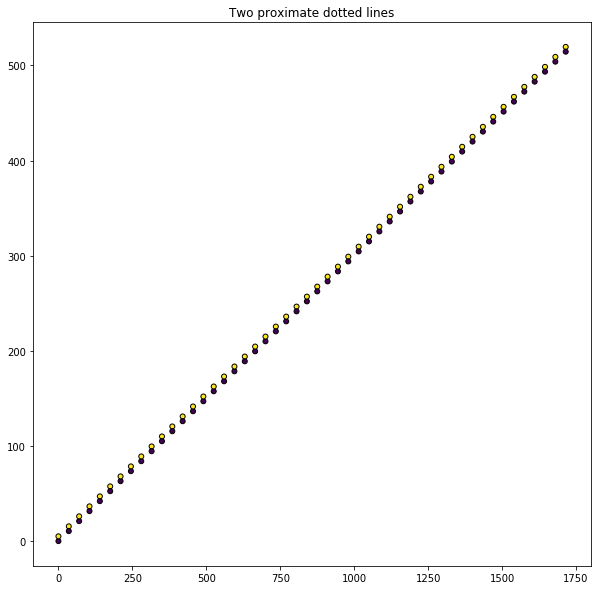

In [427]:
np.random.seed(0)
X_axis = np.array(list(range(0, class_size*step, step)))
Y_axis = alpha * X_axis

Y_axis =  np.append(Y_axis, alpha * X_axis + class_sep)
X_axis = np.append(X_axis, np.array(list(range(0, class_size*step, step))))

y = np.array([0] * class_size + [1] * class_size)

X = np.append([X_axis], [Y_axis, y], axis=0).T

np.random.shuffle(X)

plt.figure(figsize=(10, 10))
plt.title("Two proximate dotted lines", fontsize='large')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, 2],
            s=25, edgecolor='k')

In [0]:
train_ids, test_ids = train_test_split(range(n_samples), test_size=0.3, random_state=42)
y = X[:, 2]
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

In [431]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train) 
accuracy_score(y_test, neigh.predict(X_test))

0.36666666666666664

In [430]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train, y_train) 
accuracy_score(y_test, clf.predict(X_test))

1.0

## Task 2

чтобы регрессия плохо работала, можно нарушить предположение о линейной разделимости данных, например нарисуем круги

In [0]:
n_samples = 1000
noise = 0.001

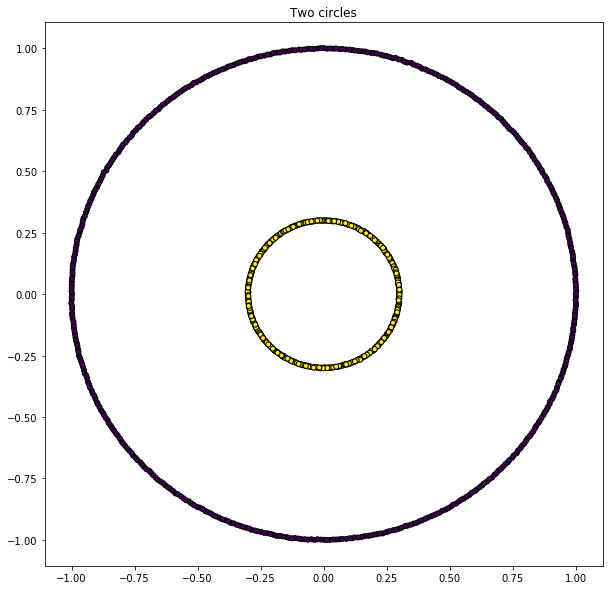

In [0]:
X, y = make_circles(n_samples=n_samples, factor=0.3, noise=noise)
plt.figure(figsize=(10, 10))
plt.title("Two circles", fontsize='large')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [0]:
train_ids, test_ids = train_test_split(range(length), test_size=0.3, random_state=42)
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

In [0]:
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(X_train, y_train) 
accuracy_score(y_test, neigh.predict(X_test))

1.0

In [0]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
clf.fit(X_train, y_train) 
accuracy_score(y_test, clf.predict(X_test))

0.61

## Task 3
чтоб cosine similarity distance было низкое, и euclidian distance высокое, положим датасеты вокруг нуля

In [0]:
n_samples = 1000
class_size = int(n_samples/2)
fuzz = 0.5
class_sep = 0.3

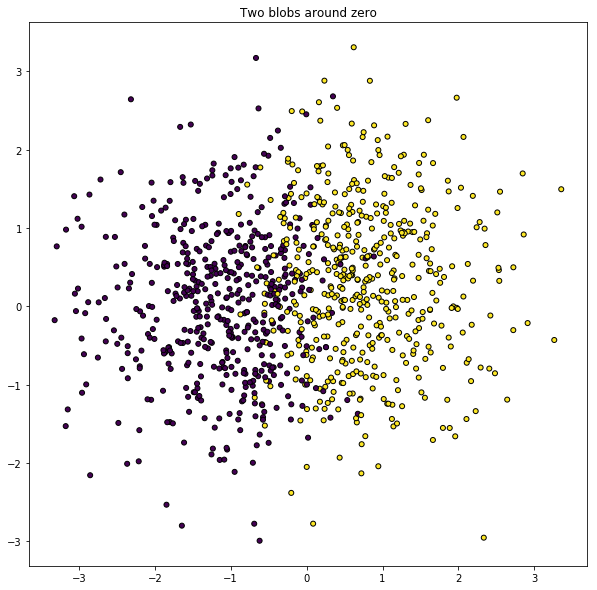

In [0]:
np.random.seed(0)
X_axis = -abs(np.random.normal(size=class_size)) - class_sep + fuzz * np.random.normal(size=class_size)
Y_axis = np.random.normal(size=class_size)


np.random.seed(7)
X_axis = np.append(X_axis, abs(np.random.normal(size=class_size)) - fuzz * np.random.normal(size=class_size))
Y_axis = np.append(Y_axis, np.random.normal(size=class_size) + class_sep)


y = np.array([0] * class_size + [1] * class_size)

X = np.append([X_axis], [Y_axis, y], axis=0).T

np.random.shuffle(X)

plt.figure(figsize=(10, 10))
plt.title("Two blobs around zero", fontsize='large')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=X[:, 2],
            s=25, edgecolor='k')

In [0]:
train_ids, test_ids = train_test_split(range(length), test_size=0.3, random_state=42)
X_train = X[train_ids]
X_test = X[test_ids]
y_train = y[train_ids]
y_test = y[test_ids]

In [0]:
def cos_dist(v1, v2):
    return (1 - np.inner(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))/2

In [0]:
neigh = KNeighborsClassifier(n_neighbors=100, metric="euclidean")
neigh.fit(X_train, y_train) 
accuracy_score(y_test, neigh.predict(X_test))

0.5366666666666666

In [0]:
neigh_cos = KNeighborsClassifier(n_neighbors=100,  metric=cos_dist)
neigh_cos.fit(X_train, y_train) 
accuracy_score(y_test, neigh.predict(X_test))

0.5366666666666666